## Benchmark of measure_PPI libary
Created 2025-01-07

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

In [2]:
libpath = Path("../andreas lib").resolve()
print(libpath)
sys.path.insert(0, str(libpath))
import measure_PPI

D:\Eigene Datein\Programmieren\Git\abrilka\bachelorthesis\andreas lib


In [3]:
structure_basePath = Path("../ressources/ISS AF_DMI_structures").resolve()
structure_folders = [structure_basePath / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3']]
solved_basePath = Path("../ressources/ISS DMI_solved_structures").resolve()
solvedHydrogen_basePath = Path("../ressources/ISS DMI_solved_structures hydrogens").resolve()

#### Benchmark of AF predictions

In [4]:
pathObj = {}

for path in structure_folders:
    measure_PPI.WalkFolder(path, pathObj)

measurement = measure_PPI.Run(list(pathObj.values()))

Found 400 structures
Found 525 structures
Found 445 structures
[2025-01-07 14:47:26,344 | measure_PPI | INFO] Started Taskpool of 12 processes for 1370 files
[2025-01-07 14:47:31,502 | measure_PPI | INFO] 5% - ETA 0:01:25 | current speed 15.265 s⁻¹ | average speed 15.07 s⁻¹
[2025-01-07 14:47:36,531 | measure_PPI | INFO] 16% - ETA 0:00:51 | current speed 29.625 s⁻¹ | average speed 22.29 s⁻¹
[2025-01-07 14:47:41,644 | measure_PPI | INFO] 31% - ETA 0:00:33 | current speed 39.114 s⁻¹ | average speed 27.93 s⁻¹
[2025-01-07 14:47:46,722 | measure_PPI | INFO] 47% - ETA 0:00:22 | current speed 44.12 s⁻¹ | average speed 31.973 s⁻¹
[2025-01-07 14:47:51,883 | measure_PPI | INFO] 57% - ETA 0:00:18 | current speed 27.705 s⁻¹ | average speed 31.109 s⁻¹
[2025-01-07 14:47:56,948 | measure_PPI | INFO] 68% - ETA 0:00:13 | current speed 29.024 s⁻¹ | average speed 30.763 s⁻¹
[2025-01-07 14:48:01,949 | measure_PPI | INFO] 80% - ETA 0:00:08 | current speed 32.791 s⁻¹ | average speed 31.049 s⁻¹
[2025-01-07 14

In [5]:
measurement

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,883.012,4.542,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,889.343,4.559,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,890.493,4.574,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,894.777,4.529,30


#### Sample structure

In [6]:
#Loading sample structure
sampleStructure_name = "LIG_NRP_CendR_1_2ORZ"
sampleStructure_path = structure_folders[1] / sampleStructure_name / "ranked_0.pdb"
#sampleStructure_name = "DEG_MDM2_SWIB_1_1YCR"
#sampleStructure_path = structure_folders[0] / sampleStructure_name / "ranked_1.pdb"
measure_PPI.OpenStructure
structure_biopy, atomarray_biotite = measure_PPI.OpenStructure(sampleStructure_path, sampleStructure_name)
print(measure_PPI.calculate_min_distance(atomarray_biotite, max_cutoff = 200))
measure_PPI.EvaluateStructure(sampleStructure_path, sampleStructure_name)

6.297


{'structure_name': 'LIG_NRP_CendR_1_2ORZ',
 'file': 'ranked_0.pdb',
 'hbonds': 5,
 'salt_bridges': 2,
 'buried_area': 698.607,
 'min_distance': 6.297,
 'hydrophobic_interactions': 0}

## Validation
Is the data comparable to the data previously generated

In [7]:
issData = pd.read_csv(Path("../ISS Code/output/structure_analysis_results_biopython_with_hydrophobic_and_final.csv"))
issData

,prediction_name,structure_file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [8]:
joinedData = pd.merge(
    left=measurement, 
    right=issData,
    how='outer',
    left_on=['structure_name', 'file'],
    right_on=['prediction_name', 'structure_file'],
)
joinedData

,structure_name,file,hbonds_x,salt_bridges_x,buried_area_x,min_distance_x,hydrophobic_interactions_x,prediction_name,structure_file,hbonds_y,salt_bridges_y,buried_area_y,min_distance_y,hydrophobic_interactions_y
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,883.012,4.542,29,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,889.343,4.559,29,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,890.493,4.574,30,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,894.777,4.529,30,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [9]:
print("H-Bonds")
column = "hbonds"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

H-Bonds


,structure_name,file,hbonds_x,hbonds_y


In [10]:
print("Buried surface area")
column = "buried_area"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 10")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Buried surface area


,structure_name,file,buried_area_x,buried_area_y
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,613.651,688.863
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,580.310,648.414
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,662.104,724.694
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,398.498,450.095
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,323.304,359.838
...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,883.012,915.859
1338,TRG_PTS1_2C0L,ranked_1.pdb,889.343,933.190
1339,TRG_PTS1_2C0L,ranked_2.pdb,890.493,932.483
1340,TRG_PTS1_2C0L,ranked_3.pdb,894.777,930.683


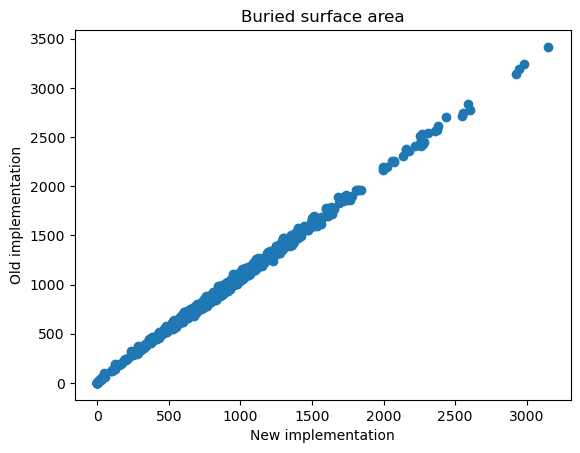

In [11]:
plt.scatter(joinedData["buried_area_x"], joinedData["buried_area_y"])
plt.xlabel("New implementation")
plt.ylabel("Old implementation")
plt.title("Buried surface area")
plt.show()

In [12]:
print("Salt bridges")
print("(Difference is expected as the original ISS code only considered acidic in chain 1 and basic in chain2)")
# That one is ok, as there was an error in the original ISS code
column = "salt_bridges"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Salt bridges
(Difference is expected as the original ISS code only considered acidic in chain 1 and basic in chain2)


,structure_name,file,salt_bridges_x,salt_bridges_y
9,DEG_COP1_1_5IGO,ranked_4.pdb,2,0
10,DEG_Kelch_Keap1_1_2FLU,ranked_0.pdb,11,0
11,DEG_Kelch_Keap1_1_2FLU,ranked_1.pdb,9,0
12,DEG_Kelch_Keap1_1_2FLU,ranked_2.pdb,11,0
13,DEG_Kelch_Keap1_1_2FLU,ranked_3.pdb,9,0
...,...,...,...,...
1325,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_3.pdb,1,0
1327,TRG_NES_CRM1_1_3GB8,ranked_0.pdb,5,0
1328,TRG_NES_CRM1_1_3GB8,ranked_1.pdb,3,0
1329,TRG_NES_CRM1_1_3GB8,ranked_2.pdb,4,0


In [13]:
print("Salt bridges, but smaller previous values are filtered")
column = "salt_bridges"
divergingRows = joinedData.query(f"({column}_x - {column}_y) < 0")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Salt bridges, but smaller previous values are filtered


,structure_name,file,salt_bridges_x,salt_bridges_y


In [23]:
print("interface distance")
print("Note: NaN values means a distance greater cutoff, which was previously equal to 0")
print("This table will consider x = NaN for any x")
column = "min_distance"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

interface distance
Note: NaN values means a distance greater cutoff, which was previously equal to 0
This table will consider NaN = 0


,structure_name,file,min_distance_x,min_distance_y


In [32]:
print("interface distance with NaN values")
print("Note: NaN values means a distance greater cutoff, which was previously equal to 0")
print("This table will consider x = NaN only for x>0")
column = "min_distance"
divergingRows = joinedData.query(f"({column}_x.isnull()) and {column}_y > 0")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

interface distance with NaN values
Note: NaN values means a distance greater cutoff, which was previously equal to 0
This table will consider x = NaN only for x>0


,structure_name,file,min_distance_x,min_distance_y
335,LIG_HOMEOBOX_1B72,ranked_0.pdb,NaN,12.319908
337,LIG_HOMEOBOX_1B72,ranked_2.pdb,NaN,14.745695
338,LIG_HOMEOBOX_1B72,ranked_3.pdb,NaN,10.803395
665,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,ranked_3.pdb,NaN,10.045623
711,MDOC_MAPK_JIP1_4_4H3B.DLIG_PAM2_1_1JGN,ranked_4.pdb,NaN,11.678234
785,MLIG_AP2alpha_1_1KY7.DLIG_PAM2_1_1JGN,ranked_3.pdb,NaN,10.408350
901,MLIG_EH1_1_2CE8.DLIG_SH3_CIN85_PxpxPR_1_2BZ8,ranked_4.pdb,NaN,11.388299
956,MLIG_IBAR_NPY_1_2YKT.DLIG_UFM1_UFIM_1_5HKH,ranked_4.pdb,NaN,13.261061
1032,MLIG_NRP_CendR_1_2ORZ.DLIG_KLC1_Yacidic_2_6FUZ,ranked_0.pdb,NaN,10.670957


In [16]:
print("Hydrophic interactions")
column = "hydrophobic_interactions"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

Hydrophic interactions


,structure_name,file,hydrophobic_interactions_x,hydrophobic_interactions_y
